In [1]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# **Metodo de Rugen Kutta**

- Calcular $k_1 = f(t_0, y_0)$
- Calcular $k_2 = f(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_1)$
- Calcular $k_3 = f(t_0+\frac{h}{2}, y_0+\frac{h}{2}k_2)$
- Calcular $k_4 = f(t_0+h, y_0+hk_3)$

Luego se calcula el promedio, 

$prom = \frac{h}{6}(k_1+k_2+k_3+k_4)$

Por último, 

$y_{n+1}=y_0+prom$

In [ ]:
to = 0
tfin = 1

#numero de tiempos

Nt = 100 

t = np.linspace(0, tfin, 100)
h = 1 / Nt
h


0.01

In [ ]:
def funcion (t, y, params):

  a =params[0]

  dydt = -a * y

  return dydt

#condicion incial 

yo = 100

#Parametros de la ecuacion diferencial

a = 1
params = (a,)

#tiempo inicial

to = 0

#tiempo final

tfin = 1

#numero de tiempos

Nt = 100 
 
t = np.linspace(0, tfin, 100)

#Espaciamiento

h = 1 / Nt

#puntos

k1 = funcion(to, yo, params)
k2 = funcion(to + h/2, yo + h/2 * k1, params)
k3 = funcion(to + h/2, yo + h/2 * k2, params)
k4 = funcion(to + h, yo + h * k3, params)

#promedio

kmean = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)


y1 = yo + kmean * h

t1 = to + h

k1 = funcion(t1, y1, params)
k2 = funcion(t1 + h/2, y1 + h/2 * k1, params)
k3 = funcion(t1 + h/2, y1 + h/2 * k2, params)
k4 = funcion(t1 + h, y1 + h * k3, params)

kmean = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

y2 = y1 + kmean * h

In [ ]:
y1

99.004983375

In [ ]:
N = 100

y = np.zeros(N)
y[0] = N

tfin = 1

t = np.linspace(0, tfin, 100)


for i in range(N-1):

  h = 1 / N 
  
  k1 = funcion(t[i], y[i], params)
  k2 = funcion(t[i] + h/2, y[i] + h/2 * k1, params)
  k3 = funcion(t[i] + h/2, y[i] + h/2 * k2, params)
  k4 = funcion(t[i] + h, y[i] + h * k3, params)
  
  kmean = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

  y_ = y[i] + kmean * h

  y[i+1] = y_

Text(0, 0.5, '$y$')

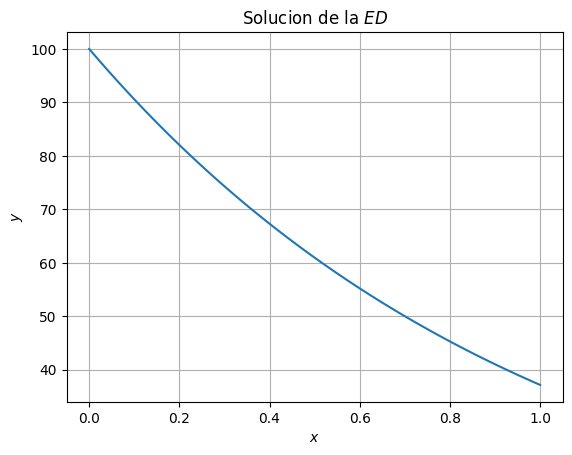

In [ ]:
plt.plot(t,y)
plt.title('Solucion de la $ED$')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')

# **Atractor de Lorenz**

$\frac{dx}{dt}=a(y-x)$

$\frac{dy}{dt}=x(b-z)-y$

$\frac{dz}{dt}=xy-cz$


In [ ]:
a = 10
b = 28
c = 8/3

params1 = (a,b,c)

def fun1 (t,x,y,z, params1):

  a = params1[0]

  dxdt = a* (y - x)

  return dxdt

def fun2 (t,x,y,z, params1):

  b = params1[1]

  dydt = x * (b - z) - y

  return dydt

def fun3 (t,x,y,z, params1):

  c = params1[2]

  dzdt = x*y - c*z

  return dzdt


In [ ]:
fun = [fun1, fun2, fun3]

In [ ]:
def lorenz(fun, param1):

  tf = 80
  dt  = 0.01
  t = np.arange(0,tf,dt)
  h = dt
  N = len(t)

  
  y = np.zeros(N)
  x = np.zeros(N)
  z = np.zeros(N)

  y[0] = 1
  x[0] = 1
  z[0] = 1

  for i in range(N-1):

    k1 = fun1(t[i], x[i], y[i], z[i], param1)
    k2 = fun1(t[i] + h/2, x[i] + h/2 * k1, y[i], z[i], param1)
    k3 = fun1(t[i] + h/2, x[i] + h/2 * k2, y[i], z[i], param1)
    k4 = fun1(t[i] + h, x[i] + h * k3, y[i], z[i],param1)


    kmean = (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    x[i+1] = x[i] + kmean

    q1 = fun2(t[i], x[i], y[i], z[i], param1)
    q2 = fun2(t[i] + h/2, x[i], y[i] + h/2 * k1, z[i], param1)
    q3 = fun2(t[i] + h/2, x[i], y[i] + h/2 * k2, z[i], param1)
    q4 = fun2(t[i] + h, x[i], y[i] + h * k3, z[i], param1)


    qmean = (1 / 6) * (q1 + 2 * q2 + 2 * q3 + q4)

    y[i+1] = y[i] + qmean * h

    w1 = fun3(t[i],x[i], y[i],  z[i], param1)
    w2 = fun3(t[i] + h/2, x[i], y[i], z[i] + h/2 * k1, param1)
    w3 = fun3(t[i] + h/2, x[i], y[i], z[i] + h/2 * k2, param1)
    w4 = fun3(t[i] + h, x[i], y[i], z[i] + h * k3, param1)


    wmean = (1 / 6) * (w1 + 2 * w2 + 2 * w3 + w4)

    z[i+1] = z[i] + wmean * h

  return x, y, z

In [ ]:
l = lorenz(fun, params1)
l

(array([  1.        ,   1.        ,   1.02474225, ..., -13.21785609,
        -13.70434126, -14.13159049]),
 array([  1.        ,   1.26      ,   1.51744089, ..., -18.33000813,
        -18.19402184, -17.82954098]),
 array([ 1.        ,  0.98333333,  0.96937571, ..., 27.6233368 ,
        29.31614325, 31.03354196]))

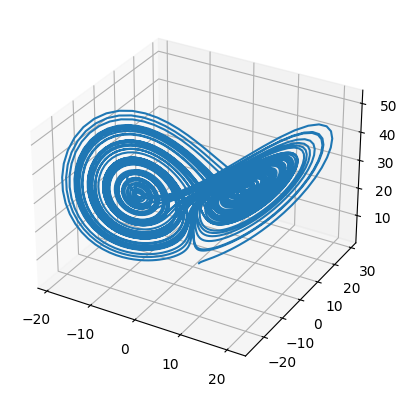

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projecstion='3d')
ax.plot(l[0], l[1], l[2])
plt.show()